In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df= pd.read_pickle( '../../data/Nvidia Holder Analysis/screening_full_universe_v2.pkl')
df

style            fund_family  ticker           aum  \
DATE     hldr_id                                                              
20220930 M4004630   Generalist         Vanguard Funds   VTSMX  1.058553e+12   
         M4004543   Generalist         Vanguard Funds   VFINX  6.873636e+11   
         M4017554   Generalist      PowerShares Funds     QQQ  1.482319e+11   
         M4006564   Generalist             SPDR Funds     SPY  3.274303e+11   
         M4001597        Index                  Other   FXAIX  3.254562e+11   
...                        ...                    ...     ...           ...   
20230831 M26129734  Generalist                  Other    N100  1.329879e+06   
         M4257447   Generalist                  Other    CBLS  5.075026e+06   
         M23431828  Generalist                  Other  440340  1.967357e+07   
         M26189410      Growth         Congress Funds    CAML  1.296647e+06   
         M21374403  Generalist  Smart Sentiment Funds    OAIE  5.891182e+05   

                                                            hldr_name  \
DATE     hldr_id                                                        
20220930 M4004630                     Vanguard Total Stock Market ETF   
         M4004543                             Vanguard 500 Index Fund   
         M4017554                                   Invesco QQQ Trust   
         M4006564                              SPDR S&P 500 ETF Trust   
         M4001597                             Fidelity 500 Index Fund   
...                                                               ...   
20230831 M26129734                              Global X U.S. 100 ETF   
         M4257447                  Changebridge Long/Short Equity ETF   
         M23431828  MIRAE ASSET TIGER Global Multi Asset TIF Activ...   
         M26189410                      Congress Large Cap Growth ETF   
         M21374403       Optimize AI Smart Sentiment Event-Driven ETF   

                     position_mv  weight_in_nvda  
DATE     hldr_id                                  
20220930 M4004630   8.608434e+09        0.008132  
         M4004543   6.887581e+09        0.010020  
         M4017554   3.764865e+09        0.025398  
         M4006564   3.291663e+09        0.010053  
         M4001597   3.283662e+09        0.010089  
...                          ...             ...  
20230831 M26129734  7.650025e+04        0.057524  
         M4257447   7.156475e+04        0.014101  
         M23431828  5.280985e+04        0.002684  
         M26189410  5.231630e+04        0.040347  
         M21374403  4.392595e+04        0.074562  

[50722 rows x 7 columns]

<Axes: xlabel='DATE', ylabel='weight_in_nvda'>

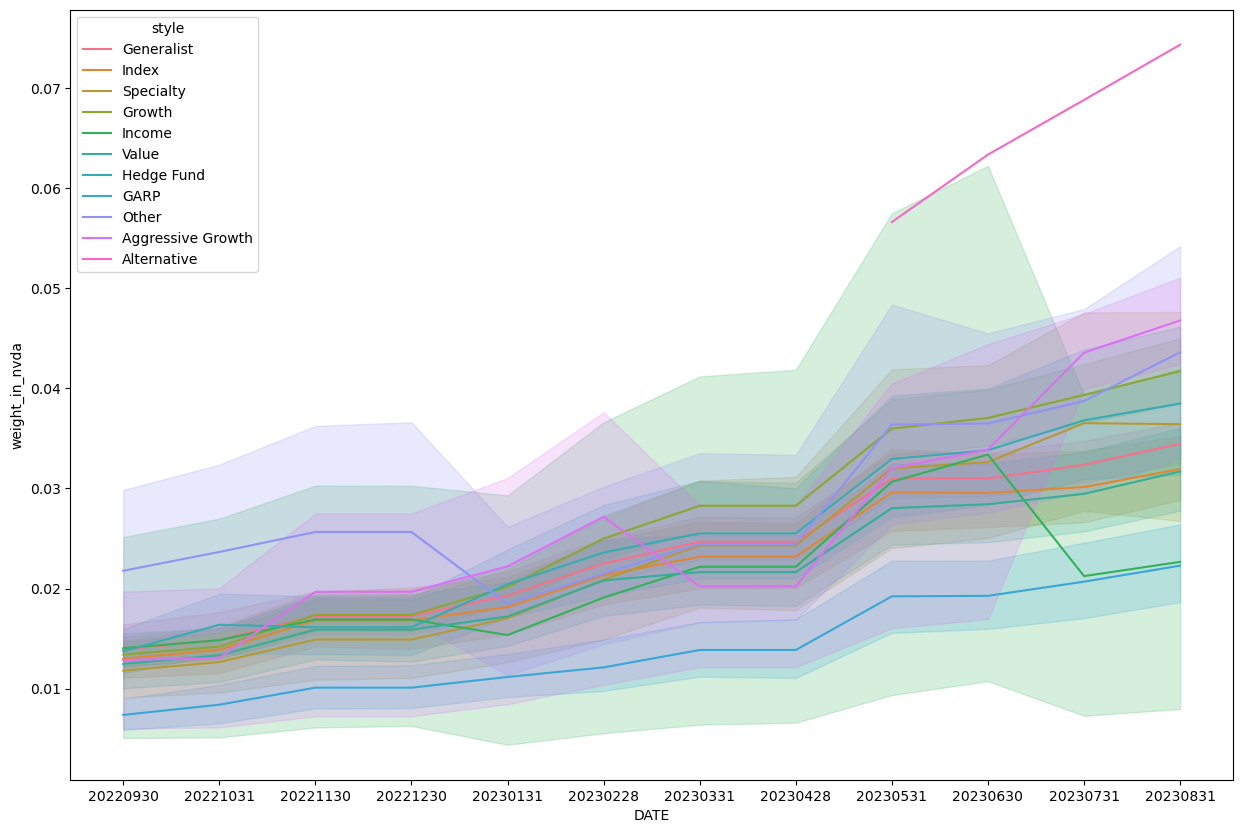

In [7]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(data = df.reset_index(), x = 'DATE',y='weight_in_nvda',hue='style')

In [16]:
df_g = df.groupby(['DATE','fund_family']).agg({'aum':'sum',
                'position_mv':'sum',
                'style':'first'})
df_g['weight'] = df_g['position_mv']/df_g['aum']
df_g

aum   position_mv       style    weight
DATE     fund_family                                                          
20220930  Transamerica Funds  4.319900e+08  4.327918e+06  Generalist  0.010019
         6 Meridian Funds     4.145014e+08  4.940087e+06  Generalist  0.011918
         AB Funds             1.747672e+10  3.286821e+08  Generalist  0.018807
         ACV Funds            2.966320e+07  4.594612e+05       Index  0.015489
         AGF Funds            3.067904e+09  5.332663e+07      Growth  0.017382
...                                    ...           ...         ...       ...
20230831 Zacks Funds          4.738093e+07  1.869567e+06  Generalist  0.039458
         iShare Funds         7.222253e+08  4.816703e+07  Generalist  0.066693
         iShares DJ Funds     1.676071e+09  4.874596e+07  Generalist  0.029083
         iShares Fund         1.280182e+10  4.108601e+08  Generalist  0.032094
         iShares Funds        8.065883e+11  3.055556e+10  Generalist  0.037882

[6047 rows x 4 columns]

<Axes: xlabel='DATE', ylabel='weight'>

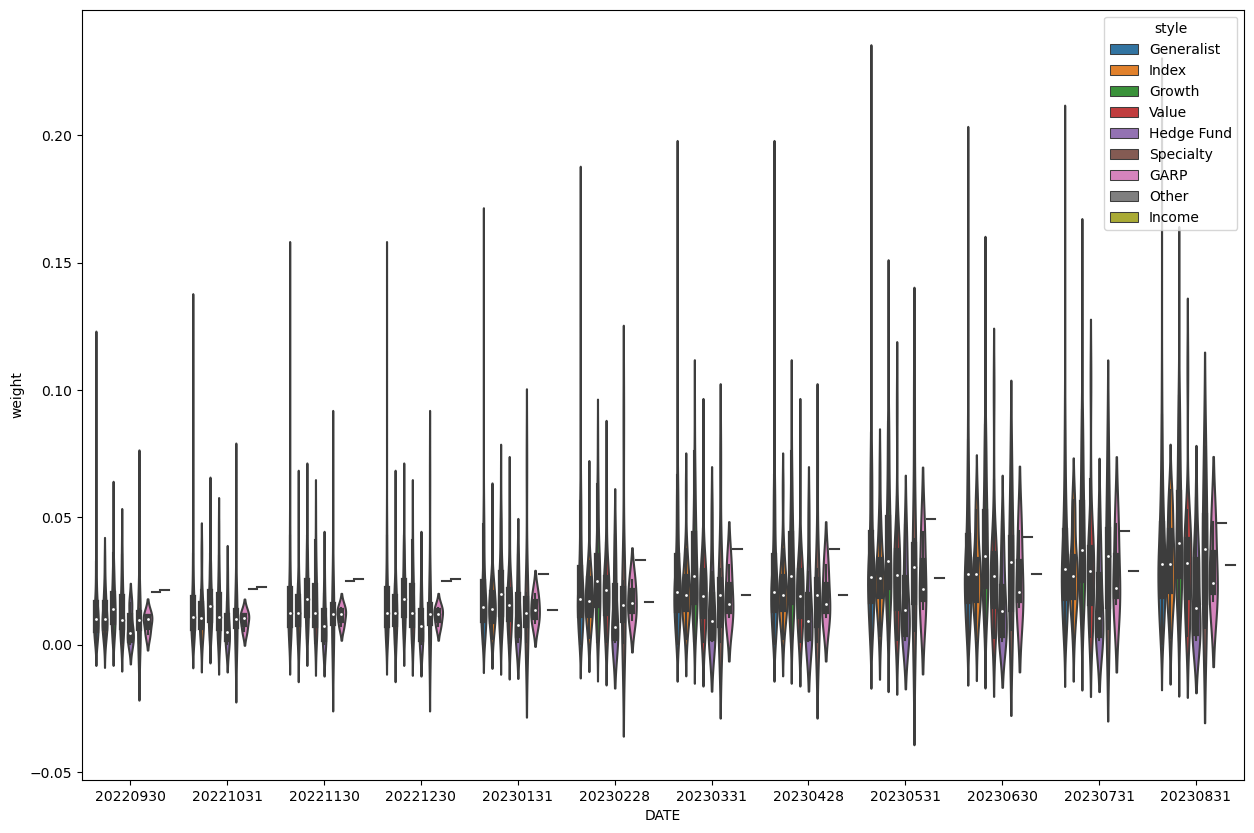

In [18]:
fig,ax = plt.subplots(figsize=(15,10))
sns.violinplot(data = df_g.reset_index(),x='DATE',y = 'weight',hue='style')

In [19]:
df_g2 = df.groupby(['DATE','style']).agg({'aum':'sum',
                'position_mv':'sum'})
df_g2['weight'] = df_g2['position_mv']/df_g2['aum']
df_g2

aum   position_mv    weight
DATE     style                                                  
20220930 Aggressive Growth  2.196436e+08  3.243541e+06  0.014767
         GARP               5.194201e+10  2.852609e+08  0.005492
         Generalist         8.155571e+12  8.919063e+10  0.010936
         Growth             5.210190e+11  5.787359e+09  0.011108
         Hedge Fund         6.793545e+10  7.217862e+08  0.010625
...                                  ...           ...       ...
20230831 Income             9.184578e+10  1.632248e+09  0.017772
         Index              7.190974e+11  2.337763e+10  0.032510
         Other              1.573897e+09  5.908978e+07  0.037544
         Specialty          3.575236e+10  2.527538e+09  0.070696
         Value              2.617985e+11  5.091752e+09  0.019449

[124 rows x 3 columns]

<Axes: xlabel='DATE'>

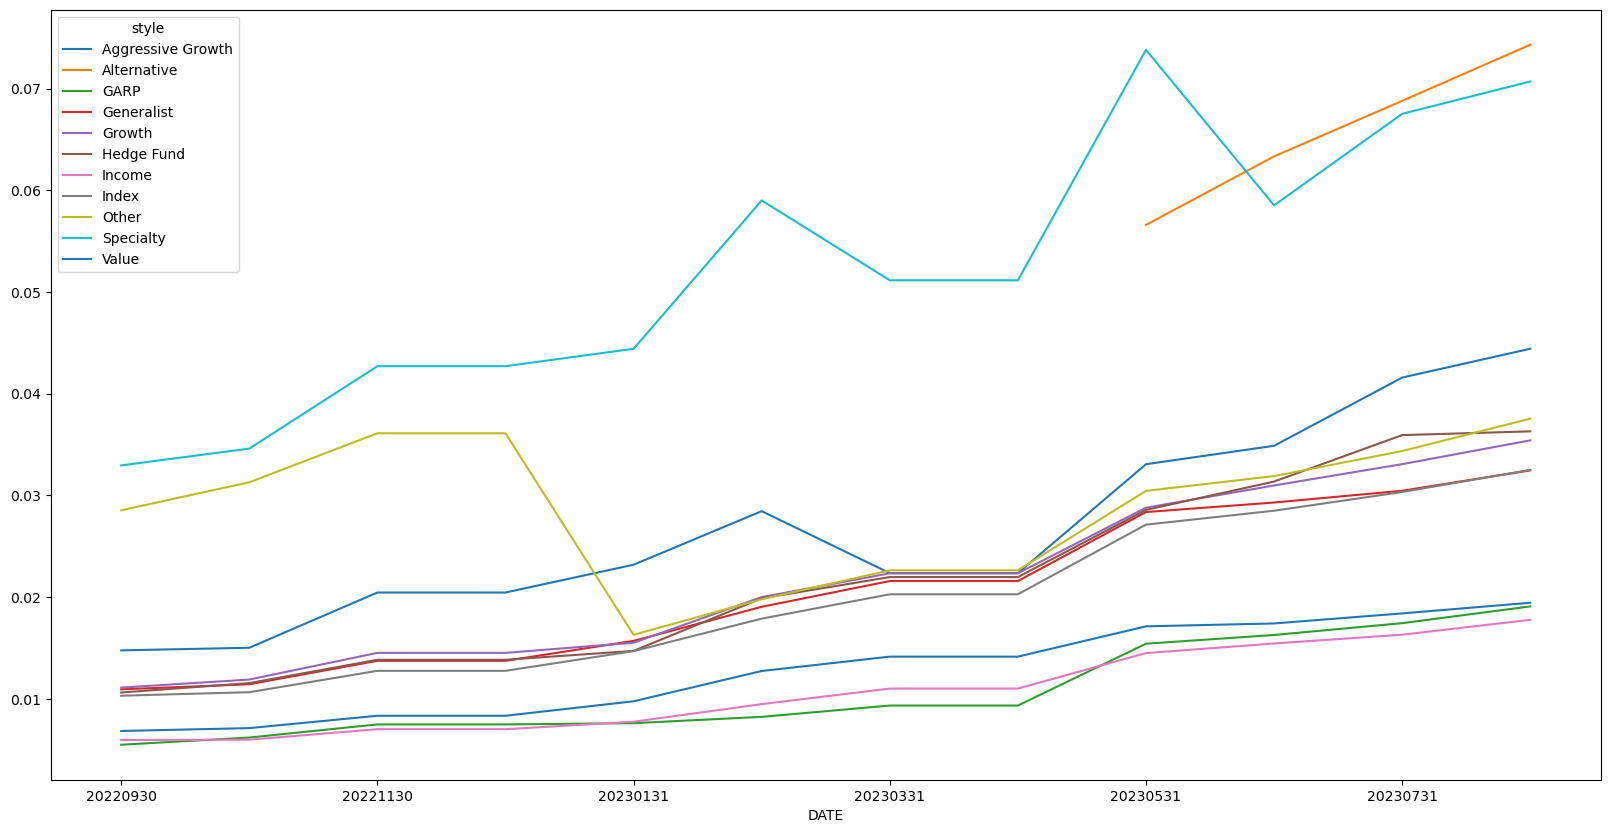

In [22]:
df_g2['weight'].unstack().plot(kind='line',figsize= (20,10))